In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("salary_data.csv")
df = df.sample(frac=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 13 to 9
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 720.0 bytes


In [295]:
X=np.array(df.iloc[:,:1])
Y=np.array(df.iloc[:,1:])

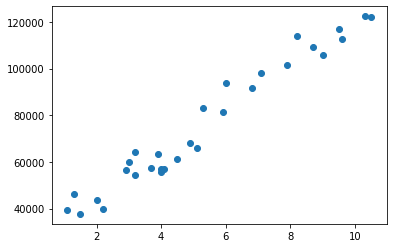

In [296]:
plt.scatter(X,Y)

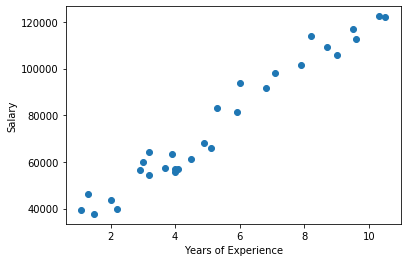

In [297]:
plt.scatter(X,Y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Splitting of Data in 2 Parts

In [298]:
split_value=round((len(X)-(len(X)*0.25)))
#train data has 75% of data and cv data has 25% of data

In [299]:
x_train=X[:split_value].copy()
y_train=Y[:split_value].copy()
x_cv=X[split_value:].copy()
y_cv=Y[split_value:].copy()

# Linear Regression Model(Scratch)

In [300]:
def gradient_descent(x_train,y_train):
    n=300 #no. of iterations
    alpha=0.009 #learning rate
    m=len(x_train)
    s=0 #slope
    c=0 #intercept
    cost=[]
    it=[]
    y=y_train[:].copy()
    for i in range(n):
        y_pred=s*x_train+c
        cost_Function=(1/(2*m))*(sum(value**2 for value in (y-y_pred)))
        temp=(1/m)*(sum((y_pred-y)*x_train)) #derivative w.r.t slope(s)
        temp1=(1/m)*(sum(y_pred-y)) #derivative w.r.t intercept(c)
        s=s-alpha*(temp) # updation of a repeatedly
        c=c-alpha*(temp1) # updation of b repeatedly
        if(i%10==0):
            cost.append(cost_Function[0])
            it.append(i)
    cv=s,c,cost,it
    return cv

In [301]:
p=gradient_descent(x_train,y_train)
new_y=(p[0][0]*x_cv)+p[1][0]

In [302]:
new_y

array([[ 26606.63353827],
       [107729.34809085],
       [134770.25294171],
       [ 48944.77232811],
       [123013.33778916],
       [117134.88021288],
       [ 64228.76202642],
       [ 54823.22990438]])

# Plot

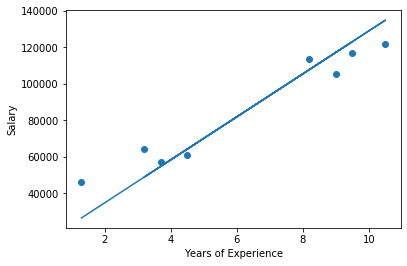

In [303]:
plt.scatter(x_cv,y_cv)
plt.plot(x_cv,new_y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [304]:
mse=(sum(new_y-y_cv)**2)
mse

array([98680048.03338513])

# Plot b/w Cost & Iteration

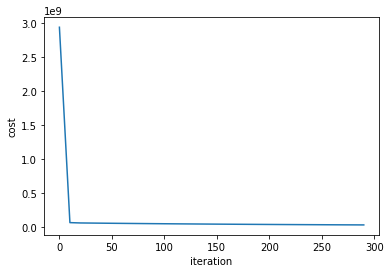

In [305]:
iterr=p[3]
costt=p[2]
plt.plot(iterr,costt)
#plt.plot(x_test,new_y)
plt.xlabel("iteration")
plt.ylabel("cost")
plt.show()

# Linear Regression Model (sklearn)

In [306]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(x_train,y_train)
y_predd=lreg.predict(x_cv)
mse_sk=(sum(y_predd-y_cv)**2)

In [307]:
mse_sk

array([1.03278411e+08])

# Comparison b/w Scratch & sklearn

In [308]:
if(mse[0]<mse_sk[0]):
    print("Scratch is best")
else:
    print("Sklearn is best")

Scratch is best
